In [299]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import auc
from collections import Counter

In [300]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k
        
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = [self.predict_y(x) for x in X_test]
        return np.array(y_pred)
    
    def get_distances(self, x):
        return [self.euclidean_distance(x, x_train) for x_train in X_train]
    
    def predict_y(self, x):
        distances = self.get_distances(x)
        sorted_distances, indices = np.unique(distances, return_index=True)
        k_nearest_labels  = [self.y_train[i] for i in indices[:self.k]]
        most_common_label = np.bincount(k_nearest_labels).argmax()
        return most_common_label
    
#     def predict_y(self, x):
#         distances = self.get_distances(x)
#         k_indices = np.argsort(distances)[:self.k] # Sort by distance and return indices of first k neighbors
#         k_nearest_labels  = [self.y_train[i] for i in k_indices]
#         most_common_label = np.bincount(k_nearest_labels).argmax()
#         return most_common_label
    
    def predict_with_confidence(self, X_test):
        c = [self.predict_confidence(x) for x in X_test]
        return np.array(c)
    
    def predict_confidence(self, x):
        distances = self.get_distances(x)
        sorted_distances, indices = np.unique(distances, return_index=True)
        k_nearest_labels  = [self.y_train[i] for i in indices[:self.k]]
        most_common = Counter(k_nearest_labels).most_common(1) # returns the most common element along with its count
        most_common_label, count = most_common[0]
        confidence = count / self.k
        return confidence

In [13]:
# Question 2
X1 = np.array([0, 2, 0, 0, -1, 1])
X2 = np.array([3, 0, 1, 1, 0, 1])
X3 = np.array([0, 0, 3, 2, 1, 1])
Y  = np.array(['Red', 'Red', 'Red', 'Green', 'Green', 'Red'])

unique_class, labels = np.unique(Y, return_inverse=True)

X_train, y_train = np.column_stack((X1, X2, X3)), labels

X_test = np.array([[0, 0, 0]])

In [14]:
# Question 2a and 2b
knn = KNNClassifier(k=1)
knn.fit(X_train, y_train)
distances = knn.get_distances(X_test)
print(distances)

[3.0, 2.0, 3.1622776601683795, 2.23606797749979, 1.4142135623730951, 1.7320508075688772]


In [17]:
most_common_label = knn.predict_y(X_test)
print(unique_class[most_common_label])

Green


In [18]:
# Question 2c
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
most_common_label = knn.predict_y(X_test)
print(unique_class[most_common_label])

Red


In [19]:
# Question 4
def calculate_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

    return accuracy, precision, recall


#                    Predicted Class
#                     Spam  notSpam
# Actual Class Spam    8      2
#             notSpam 16     974
TP = 8
TN = 974
FP = 16
FN = 2

accuracy, precision, recall = calculate_metrics(TP, TN, FP, FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.982
Precision: 0.3333333333333333
Recall: 0.8


[0.   0.   0.   0.25 0.25 0.5  0.5  1.  ]
[0.         0.16666667 0.33333333 0.33333333 0.66666667 0.66666667
 1.         1.        ]
[ inf 0.95 0.85 0.8  0.55 0.45 0.3  0.1 ]


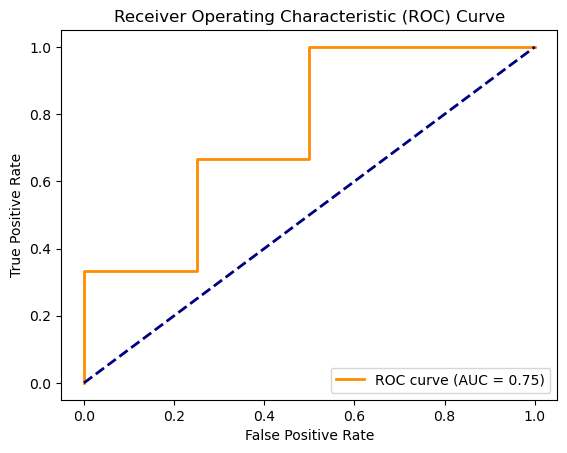

In [59]:
#Question 5
y_score = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
y_true = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]

data = np.array(list(zip(c, y)))
sorted_data = data[data[:, 0].argsort()[::-1]]

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

print(fpr)
print(tpr)

# plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:
def plot_roc_curve(data):
    c, y = data[:, 0], data[:, 1]
    
    num_neg = np.sum(np.array(y) == 0)
    num_pos = np.sum(np.array(y) == 1)
    
    TP, FP = 0, 0
    last_TP = 0
    roc_curve = []
    roc_curve.append((0, 0))
    
    for i in range(len(c)):
        if (i > 0 and c[i] != c[i - 1] and y[i] == 0 and TP > last_TP):
            FPR = FP / num_neg
            TPR = TP / num_pos
            roc_curve.append((FPR, TPR))
            last_TP = TP
            print(c[i])
            
        if (y[i] == 1):
            TP += 1
        else:
            FP += 1
            
    # Add the final point to the ROC curve
    FPR = FP / num_neg
    TPR = TP / num_pos
    roc_curve.append((FPR, TPR))
    print(roc_curve)
    
    FPR_values, TPR_values = zip(*roc_curve)
    
    plt.plot(FPR_values, TPR_values, color='lightseagreen', lw=2, label='ROC Curve')
    plt.scatter(FPR_values, TPR_values, color='lightseagreen', marker='o')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    #plt.savefig('q5a_roc.png')
    plt.show()

0.8
0.45
0.2
[(0, 0), (0.0, 0.3333333333333333), (0.25, 0.6666666666666666), (0.5, 1.0), (1.0, 1.0)]


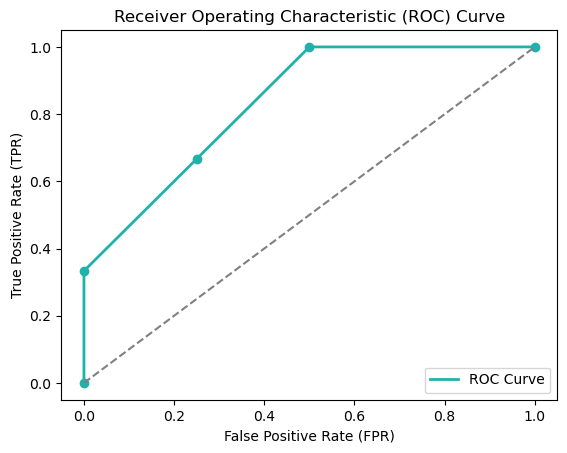

In [75]:
plot_roc_curve(sorted_data)

In [97]:
# Question 2
data = np.loadtxt('D2z.txt')
X_train, y_train = data[:, :-1], data[:, -1]
y_train = y_train.astype(int)

# Create a mesh grid of test points
x1_min, x1_max = -2, 2
x2_min, x2_max = -2, 2
step = 0.1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
X_test = np.c_[xx.ravel(), yy.ravel()]

knn = KNNClassifier(k=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test) # most_common_label
print(predictions)

[1 1 1 ... 0 0 0]


/var/folders/wk/hjx7vqvn3fz08gq0vtft2f040000gn/T/ipykernel_23103/3978402576.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='blue', label='Class 1', marker='x', edgecolors='k')


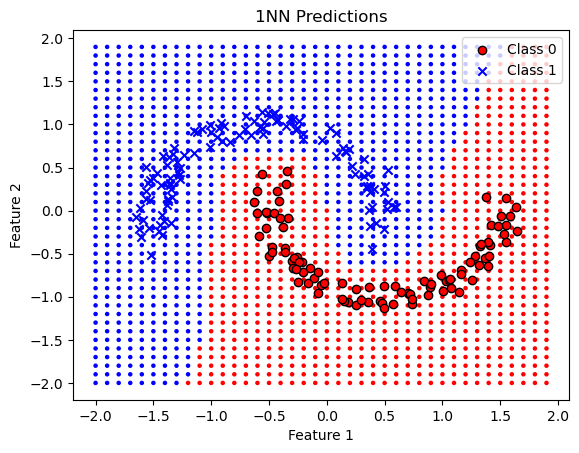

In [117]:
cmap_points = ListedColormap(['#FF0000', '#0000FF'])  # Point color

plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cmap_points, marker='.', s=20)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='red', label='Class 0', marker='o', edgecolors='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='blue', label='Class 1', marker='x', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('1NN Predictions')
plt.legend()
plt.savefig('q2_1nn.png')
plt.show()

In [123]:
# Ques: Spam filter 1NN
data = pd.read_csv('emails.csv')

X = data.iloc[:, 1:-1].values # .values converts the selected DataFrame portion into a NumPy array
y = data['Prediction'].values

num_folds = 5

accuracies = []
precisions = []
recalls = []

for fold in range(num_folds):
    test_start = fold * len(data) // num_folds
    test_end   = (fold + 1) * len(data) // num_folds
    X_test = X[test_start:test_end]
    y_test = y[test_start:test_end]
    
    X_train = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    y_train = np.concatenate((y[:test_start], y[test_end:]), axis=0)
    
    knn = KNNClassifier(k=1)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Fold 1 - Accuracy: 0.8250, Precision: 0.6536, Recall: 0.8211
Fold 2 - Accuracy: 0.8550, Precision: 0.6897, Recall: 0.8664
Fold 3 - Accuracy: 0.8630, Precision: 0.7221, Recall: 0.8415
Fold 4 - Accuracy: 0.8540, Precision: 0.7216, Recall: 0.8197
Fold 5 - Accuracy: 0.7750, Precision: 0.6052, Recall: 0.7614


In [169]:
data = pd.read_csv('emails.csv')

X = data.iloc[:, 1:-1].values # .values converts the selected DataFrame portion into a NumPy array
y = data['Prediction'].values

num_folds = 5
k_values = [1, 3, 5, 7, 10]

avg_accuracies = []

for k in k_values:
    print(f"k = {k}")
    
    fold_accuracies = []
    
    for fold in range(num_folds):
        test_start = fold * len(data) // num_folds
        test_end   = (fold + 1) * len(data) // num_folds
        X_test = X[test_start:test_end]
        y_test = y[test_start:test_end]
        
        X_train = np.concatenate((X[:test_start], X[test_end:]), axis=0)
        y_train = np.concatenate((y[:test_start], y[test_end:]), axis=0)
        
        knn = KNNClassifier(k=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        fold_accuracies.append(accuracy)
        print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}")
    
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)
    print(f"k {k} - Average Accuracy: {avg_accuracy:.4f}")

k = 1
Fold 1 - Accuracy: 0.8250
Fold 2 - Accuracy: 0.8550
Fold 3 - Accuracy: 0.8630
Fold 4 - Accuracy: 0.8540
Fold 5 - Accuracy: 0.7750
k 1 - Average Accuracy: 0.8344
k = 3
Fold 1 - Accuracy: 0.8460
Fold 2 - Accuracy: 0.8500
Fold 3 - Accuracy: 0.8560
Fold 4 - Accuracy: 0.8800
Fold 5 - Accuracy: 0.7730
k 3 - Average Accuracy: 0.8410
k = 5
Fold 1 - Accuracy: 0.8370
Fold 2 - Accuracy: 0.8520
Fold 3 - Accuracy: 0.8710
Fold 4 - Accuracy: 0.8690
Fold 5 - Accuracy: 0.7800
k 5 - Average Accuracy: 0.8418
k = 7
Fold 1 - Accuracy: 0.8370
Fold 2 - Accuracy: 0.8610
Fold 3 - Accuracy: 0.8750
Fold 4 - Accuracy: 0.8740
Fold 5 - Accuracy: 0.7790
k 7 - Average Accuracy: 0.8452
k = 10
Fold 1 - Accuracy: 0.8630
Fold 2 - Accuracy: 0.8690
Fold 3 - Accuracy: 0.8780
Fold 4 - Accuracy: 0.8870
Fold 5 - Accuracy: 0.7820
k 10 - Average Accuracy: 0.8558


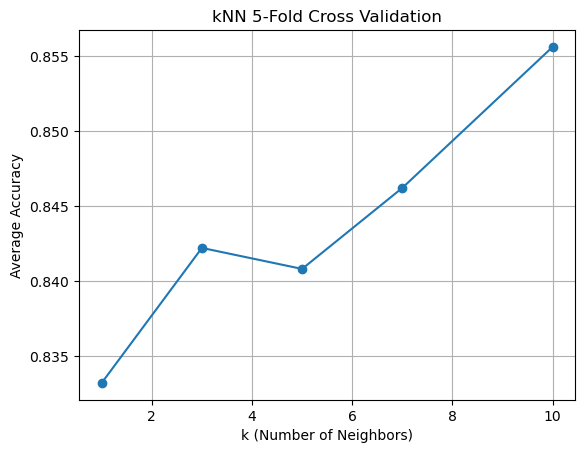

In [227]:
# Plot average accuracy versus k
plt.plot(k_values, avg_accuracies, marker='o')
plt.title('kNN 5-Fold Cross Validation')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.savefig('q4_plot.png')
plt.show()

In [301]:
# Question 3: Implement logistic regression from scratch
class LogisticRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate  = learning_rate
        self.num_iterations = num_iterations
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cross_entropy_loss(self, y_pred, y):
        return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    def gradient_descent(self, X, y, theta):
        m = len(y)
        z = np.dot(X, theta)
        y_pred = self.sigmoid(z)
        gradient = np.dot(X.T, y_pred - y) / m
        theta -= self.learning_rate * gradient
        return theta
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iterations):
            self.theta = self.gradient_descent(X, y, self.theta)
            
    def predict(self, X):
        y_pred = self.sigmoid(X.dot(self.theta))
        return np.round(y_pred)
    
    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.theta))

In [320]:
data = pd.read_csv('emails.csv')

X = data.iloc[:, 1:-1].values # .values converts the selected DataFrame portion into a NumPy array
y = data['Prediction'].values

num_folds = 5

accuracies = []
precisions = []
recalls = []

for fold in range(num_folds):
    test_start = fold * len(data) // num_folds # 0*5000/5
    test_end = (fold + 1) * len(data) // num_folds #1*5000/5 = 1000
    
    X_test = X[test_start:test_end]
    y_test = y[test_start:test_end]
    
    X_train = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    y_train = np.concatenate((y[:test_start], y[test_end:]), axis=0)
    
    model = LogisticRegression(learning_rate=0.01, num_iterations=10000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)

print(f"Mean Accuracy: {mean_accuracy}, Mean Precision: {mean_precision}, Mean Recall: {mean_recall}")

/var/folders/wk/hjx7vqvn3fz08gq0vtft2f040000gn/T/ipykernel_23103/2728715232.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold 1 - Accuracy: 0.9500, Precision: 0.9152, Recall: 0.9088


/var/folders/wk/hjx7vqvn3fz08gq0vtft2f040000gn/T/ipykernel_23103/2728715232.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold 2 - Accuracy: 0.9530, Precision: 0.9291, Recall: 0.8989


/var/folders/wk/hjx7vqvn3fz08gq0vtft2f040000gn/T/ipykernel_23103/2728715232.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold 3 - Accuracy: 0.9290, Precision: 0.9312, Recall: 0.8099


/var/folders/wk/hjx7vqvn3fz08gq0vtft2f040000gn/T/ipykernel_23103/2728715232.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold 4 - Accuracy: 0.9420, Precision: 0.9041, Recall: 0.8980


/var/folders/wk/hjx7vqvn3fz08gq0vtft2f040000gn/T/ipykernel_23103/2728715232.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold 5 - Accuracy: 0.9160, Precision: 0.8675, Recall: 0.8562
Mean Accuracy: 0.9380000000000001, Mean Precision: 0.9094264341771574, Mean Recall: 0.8743432772526862


In [303]:
def plot_roc_curve(data):
    c, y = data[:, 0], data[:, 1]
    
    num_neg = np.sum(np.array(y) == 0)
    num_pos = np.sum(np.array(y) == 1)
    
    TP, FP = 0, 0
    last_TP = 0
    roc_curve = []
    roc_curve.append((0, 0))
    
    for i in range(len(c)):
        if (i > 0 and c[i] != c[i - 1] and y[i] == 0 and TP > last_TP):
            FPR = FP / num_neg
            TPR = TP / num_pos
            roc_curve.append((FPR, TPR))
            last_TP = TP
            
        if (y[i] == 1):
            TP += 1
        else:
            FP += 1
            
    # Add the final point to the ROC curve
    FPR = FP / num_neg
    TPR = TP / num_pos
    roc_curve.append((FPR, TPR))
    return roc_curve

In [317]:
# Question 5
X_train = X[:4000]
y_train = y[:4000]

X_test = X[4000:]
y_test = y[4000:]
print(y_test.shape)

# KNN Training
# knn = KNNClassifier(k=5)
# knn.fit(X_train, y_train)
# knn_confidences = knn.predict_with_confidence(X_test)
# print(knn_confidences.shape)

# Logistic Regression Training
lr = LogisticRegression(learning_rate=0.01, num_iterations=4000)
lr.fit(X_train, y_train)
lr_confidences = lr.predict_proba(X_test)
print(lr_confidences.shape)

(1000,)


/var/folders/wk/hjx7vqvn3fz08gq0vtft2f040000gn/T/ipykernel_23103/2728715232.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


(1000,)


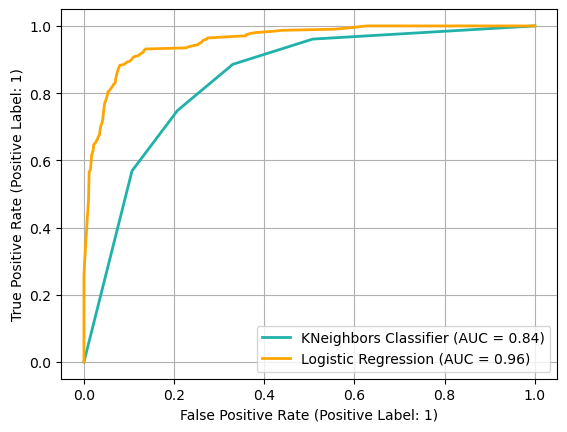

In [319]:
knn_data = np.column_stack((knn_confidences[:, 1], y_test))
sorted_knn_data = knn_data[knn_data[:, 0].argsort()[::-1]] #[::-1] reverses the order of the indices
knn_roc_curve = plot_roc_curve(sorted_knn_data)

lr_data = np.column_stack((lr_confidences, y_test))
sorted_lr_data = lr_data[lr_data[:, 0].argsort()[::-1]]
lr_roc_curve = plot_roc_curve(sorted_lr_data)

knn_FPR_values, knn_TPR_values = zip(*knn_roc_curve)
lr_FPR_values, lr_TPR_values = zip(*lr_roc_curve)

knn_roc_auc = auc(knn_FPR_values, knn_TPR_values)
lr_roc_auc = auc(lr_FPR_values, lr_TPR_values)

    
plt.plot(knn_FPR_values, knn_TPR_values, color='lightseagreen', lw=2, label=f'KNeighbors Classifier (AUC = {knn_roc_auc:.2f})')
plt.plot(lr_FPR_values, lr_TPR_values, color='orange', lw=2, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.xlabel('False Positive Rate (Positive Label: 1)')
plt.ylabel('True Positive Rate (Positive Label: 1)')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('q5_roc.png')
plt.show()

In [307]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
knn_confidences = neigh.predict_proba(X_test)

In [226]:
data = pd.read_csv('emails.csv')

X = data.iloc[:, 1:-1].values # .values converts the selected DataFrame portion into a NumPy array
y = data['Prediction'].values

num_folds = 5
k_values = [1, 3, 5, 7, 10]

avg_accuracies = []

for k in k_values:
    print(f"k = {k}")
    
    fold_accuracies = []
    
    for fold in range(num_folds):
        test_start = fold * len(data) // num_folds
        test_end   = (fold + 1) * len(data) // num_folds
        X_test = X[test_start:test_end]
        y_test = y[test_start:test_end]
        
        X_train = np.concatenate((X[:test_start], X[test_end:]), axis=0)
        y_train = np.concatenate((y[:test_start], y[test_end:]), axis=0)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        fold_accuracies.append(accuracy)
        print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}")
    
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)
    print(f"k {k} - Average Accuracy: {avg_accuracy:.4f}")

k = 1
Fold 1 - Accuracy: 0.8250
Fold 2 - Accuracy: 0.8530
Fold 3 - Accuracy: 0.8620
Fold 4 - Accuracy: 0.8510
Fold 5 - Accuracy: 0.7750
k 1 - Average Accuracy: 0.8332
k = 3
Fold 1 - Accuracy: 0.8470
Fold 2 - Accuracy: 0.8510
Fold 3 - Accuracy: 0.8590
Fold 4 - Accuracy: 0.8800
Fold 5 - Accuracy: 0.7740
k 3 - Average Accuracy: 0.8422
k = 5
Fold 1 - Accuracy: 0.8370
Fold 2 - Accuracy: 0.8500
Fold 3 - Accuracy: 0.8690
Fold 4 - Accuracy: 0.8690
Fold 5 - Accuracy: 0.7790
k 5 - Average Accuracy: 0.8408
k = 7
Fold 1 - Accuracy: 0.8390
Fold 2 - Accuracy: 0.8640
Fold 3 - Accuracy: 0.8750
Fold 4 - Accuracy: 0.8740
Fold 5 - Accuracy: 0.7790
k 7 - Average Accuracy: 0.8462
k = 10
Fold 1 - Accuracy: 0.8620
Fold 2 - Accuracy: 0.8690
Fold 3 - Accuracy: 0.8780
Fold 4 - Accuracy: 0.8870
Fold 5 - Accuracy: 0.7820
k 10 - Average Accuracy: 0.8556
